In [1]:
import pandas as pd
import glob

In [2]:
files = sorted(glob.glob("nfl-data/train/input_2023_w*.csv"))
train = pd.concat([pd.read_csv(x) for x in files], ignore_index=True)

In [3]:
print(train.head().to_string())

      game_id  play_id  player_to_predict  nfl_id  frame_id play_direction  absolute_yardline_number player_name player_height  player_weight player_birth_date player_position player_side         player_role      x      y     s     a     dir       o  num_frames_output  ball_land_x  ball_land_y
0  2023090700      101              False   54527         1          right                        42  Bryan Cook           6-1            210        1999-09-07              FS     Defense  Defensive Coverage  52.33  36.94  0.09  0.39  322.40  238.24                 21    63.259998        -0.22
1  2023090700      101              False   54527         2          right                        42  Bryan Cook           6-1            210        1999-09-07              FS     Defense  Defensive Coverage  52.33  36.94  0.04  0.61  200.89  236.05                 21    63.259998        -0.22
2  2023090700      101              False   54527         3          right                        42  Bryan Cook   

array([[<Axes: title={'center': 'game_id'}>,
        <Axes: title={'center': 'play_id'}>,
        <Axes: title={'center': 'nfl_id'}>,
        <Axes: title={'center': 'frame_id'}>],
       [<Axes: title={'center': 'absolute_yardline_number'}>,
        <Axes: title={'center': 'player_weight'}>,
        <Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 's'}>, <Axes: title={'center': 'a'}>,
        <Axes: title={'center': 'dir'}>, <Axes: title={'center': 'o'}>],
       [<Axes: title={'center': 'num_frames_output'}>,
        <Axes: title={'center': 'ball_land_x'}>,
        <Axes: title={'center': 'ball_land_y'}>, <Axes: >]], dtype=object)

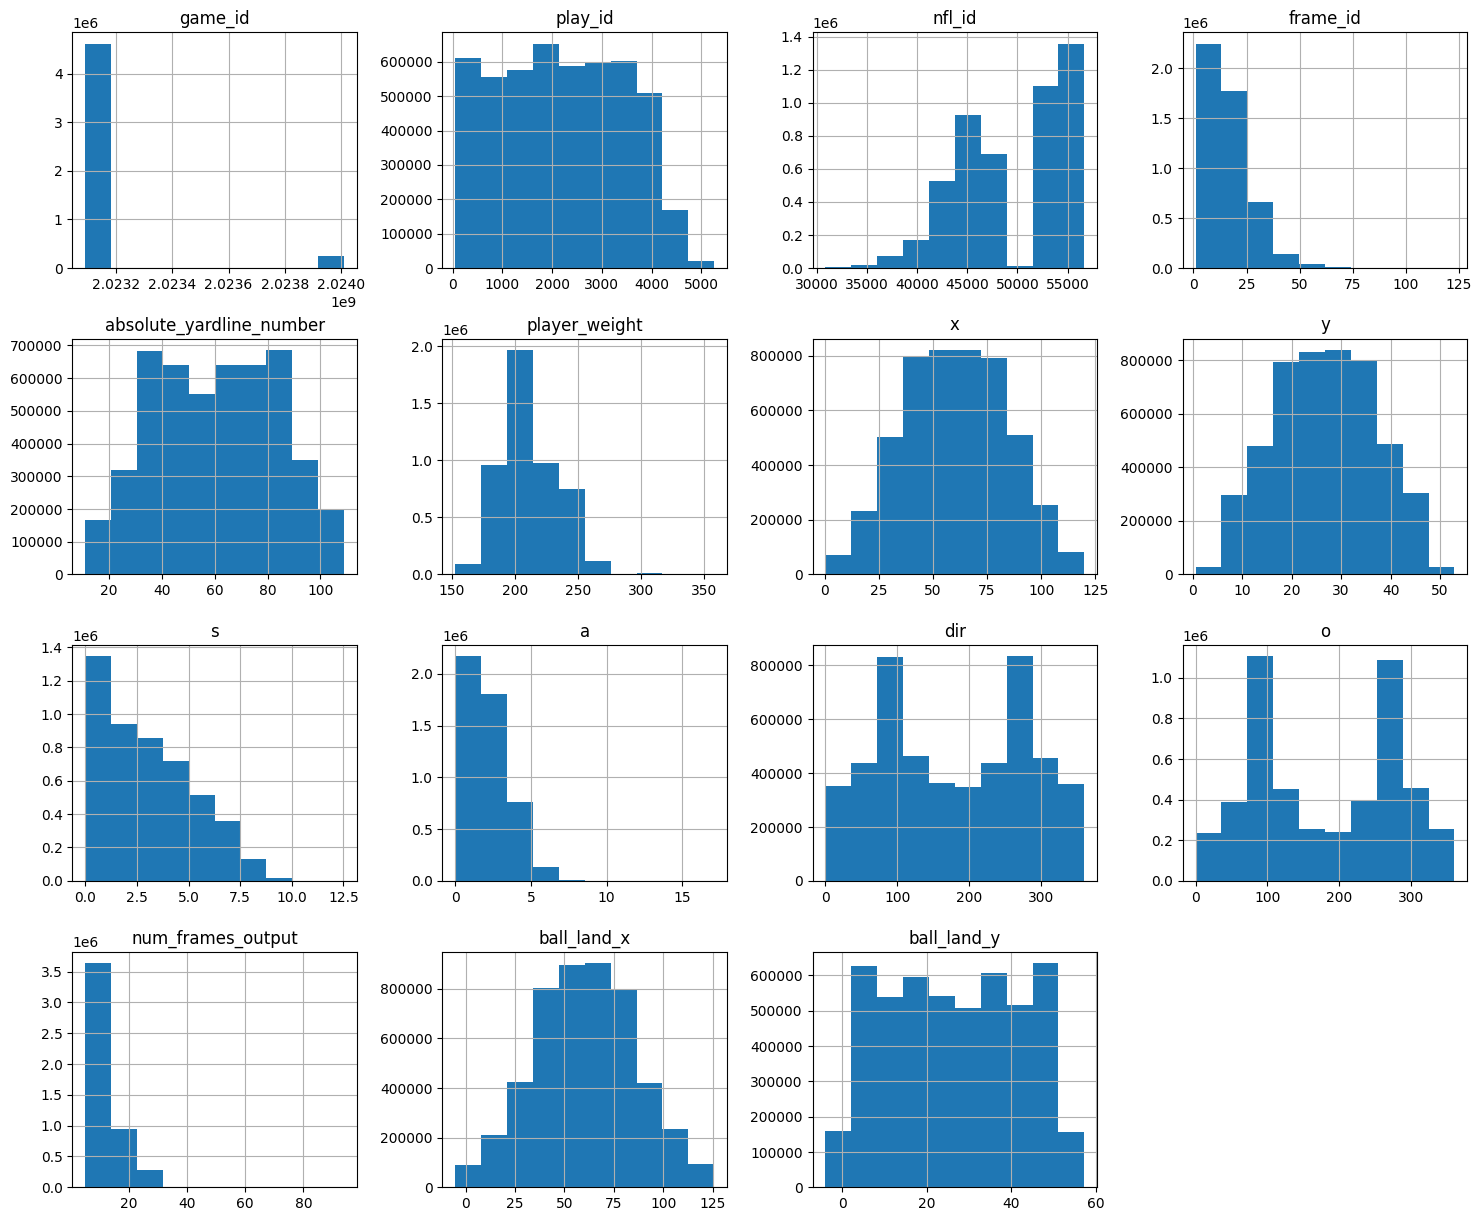

In [4]:
import seaborn as sns

train.hist(figsize=(18, 15))

<Axes: >

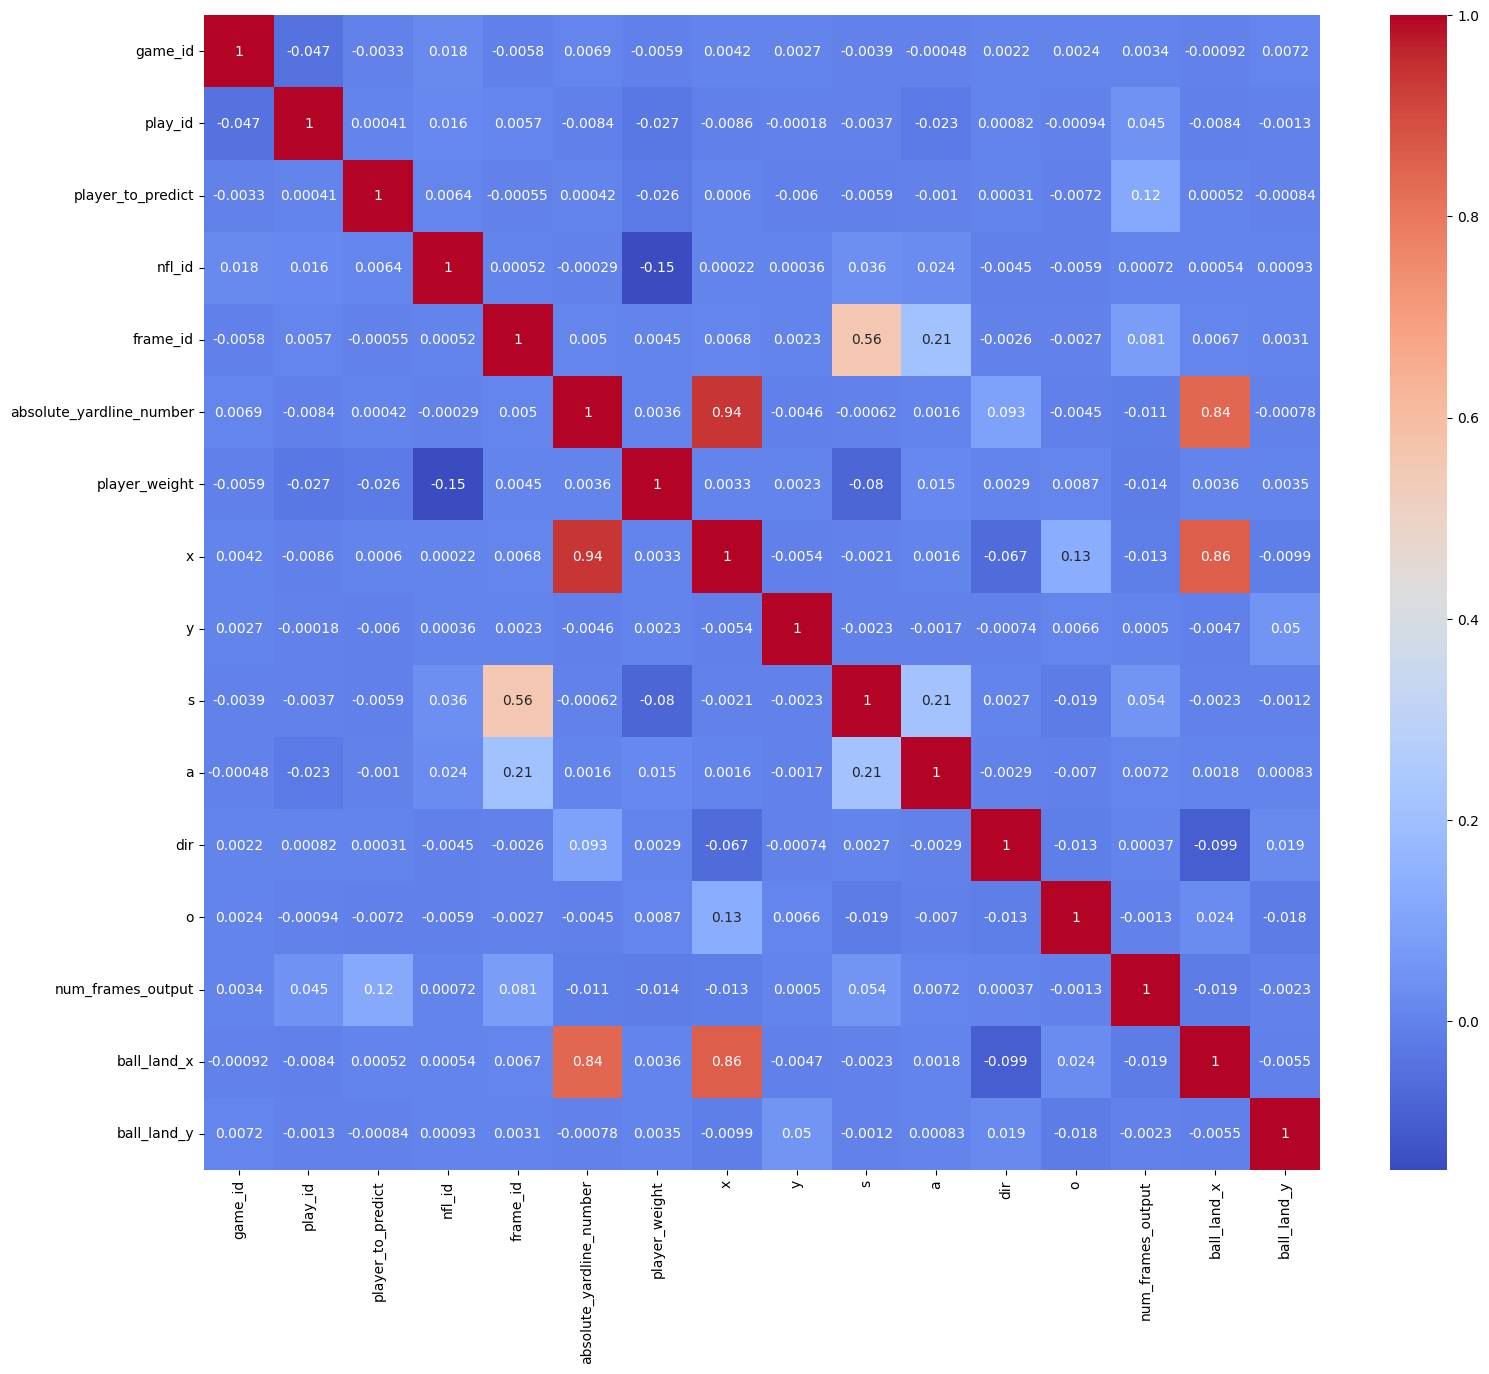

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin
class Drop(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X = X.drop(['game_id', 'play_id', 'player_name', 'player_height', 'player_birth_date'], axis=1)
        return X

In [7]:
class PlayDirection(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X = X.join(pd.get_dummies(X['play_direction'], prefix='play_tennis')).drop(['play_direction'], axis=1)
        return X

In [8]:
class playerRole(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X = X.join(pd.get_dummies(X['player_role'])).drop(['player_role'], axis=1)
        return X

In [9]:
class Height(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X['height_foot'] = X['player_height'].str.split("-").str[0].astype(int)
        X['height_inches'] = X['player_height'].str.split("-").str[1].astype(int)
        return X

In [10]:
class playerPos(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X = X.join(pd.get_dummies(X['player_position'])).drop(['player_position'], axis=1)
        return X

In [11]:
class playerSide(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X = X.join(pd.get_dummies(X['player_side'])).drop(['player_side'], axis=1)
        return X

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline(steps=[
    ('play_direction', PlayDirection()),
    ('player_role', playerRole()),
    ('player_position', playerPos()),
    ('player_side', playerSide()),
    ('player_height', Height()),
    ('drop_columns', Drop()),
    ('model', RandomForestRegressor())
])

In [13]:
from sklearn.model_selection import train_test_split

X = train.drop(['x', 'y'], axis=1)
y = train[['x', 'y']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
pipeline.fit(X_train, y_train)